# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [21]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder


---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [9]:
# Import applicants_data.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving applicants_data.csv to applicants_data (1).csv


In [60]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv("applicants_data.csv")

# Review the DataFrame
applicant_data_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [61]:
# Review the data types associated with the columns
applicant_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [62]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df.drop(["EIN", "NAME"], axis=1, inplace = True)

# Review the DataFrame
applicant_data_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [63]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [64]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [65]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [66]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)

# Review the DataFrame
encoded_df

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [67]:
numerical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes != "object"].index)
df_numerical = applicant_data_df[numerical_variables]
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
data = pd.concat([encoded_df,df_numerical], axis=1)

# Review the DataFrame
data

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,108590,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6692,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,1


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [68]:
# Define the target set y using the IS_SUCCESSFUL column
y = data['IS_SUCCESSFUL']

# Display a sample of y
y

0        1
1        1
2        0
3        1
4        1
        ..
34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, Length: 34299, dtype: int64

In [73]:
y.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [70]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = data.drop('IS_SUCCESSFUL', axis=1)

# Review the features DataFrame
X

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,STATUS,ASK_AMT
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,108590
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6692
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,142590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000


### Step 6: Split the features and target sets into training and testing datasets.


In [71]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [72]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [75]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.columns)

# Review the number of features
number_input_features

116

In [80]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [77]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  64

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

64

In [78]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  32
# Review the number hidden nodes in the second layer
hidden_nodes_layer2

32

In [79]:
# Create the Sequential model instance
nn = Sequential()


In [81]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, activation='relu', input_dim=number_input_features))

In [82]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation='relu'))

In [83]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation='sigmoid'))

In [84]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7488      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [85]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [86]:
# Fit the model using 50 epochs and the training data
model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5724 - accuracy: 0.7197
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5530 - accuracy: 0.7305
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7314
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5477 - accuracy: 0.7320
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5454 - accuracy: 0.7324
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5451 - accuracy: 0.7334
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5446 - accuracy: 0.7344
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5437 - accuracy: 0.7348
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5431 - accuracy: 0.7345
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5424 - accuracy: 0.7347

<Axes: >

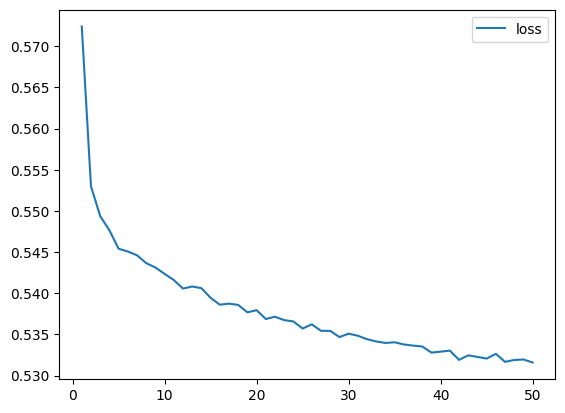

In [87]:
 # Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<Axes: >

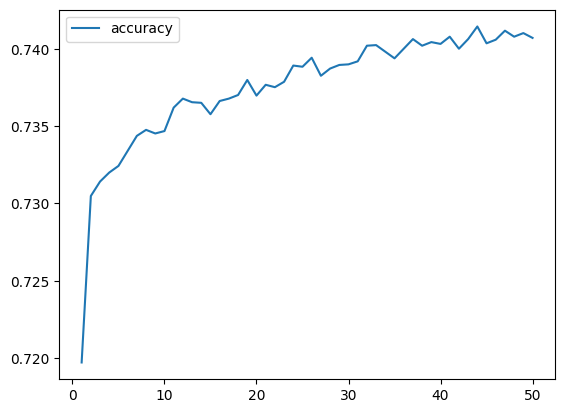

In [88]:
 # Plot the accuracy
df.plot(y="accuracy")

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [89]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5538 - accuracy: 0.7318 - 484ms/epoch - 2ms/step
Loss: 0.5537956953048706, Accuracy: 0.7317784428596497


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [90]:
# Set the model's file path
file_path = "AlphabetSoup.h5"

# Export your model to a HDF5 file
nn.save(file_path)

# Download your model to your computer
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [115]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [116]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [126]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = 16

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

16

In [127]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A1 = 8

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A1

8

In [128]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A1 = 4

# Review the number of hidden nodes in the second layer
hidden_nodes_layer3_A1

4

In [129]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [130]:

# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, activation='relu', input_dim=number_input_features))
nn_A1.add(Dense(units=hidden_nodes_layer2_A1, activation='relu'))
nn_A1.add(Dense(units=hidden_nodes_layer3_A1, activation='relu'))
# Output layer
nn_A1.add(Dense(units=number_output_neurons_A1, activation='sigmoid'))

# Check the structure of the model
nn_A1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                1872      
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 4)                 36        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [131]:
# Compile the Sequential model
nn_A1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [132]:
# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6475 - accuracy: 0.6941
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5610 - accuracy: 0.7247
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5528 - accuracy: 0.7278
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5503 - accuracy: 0.7296
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7307
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5468 - accuracy: 0.7318
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5459 - accuracy: 0.7301
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5455 - accuracy: 0.7316
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5442 - accuracy: 0.7337
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5441 - accura

<Axes: >

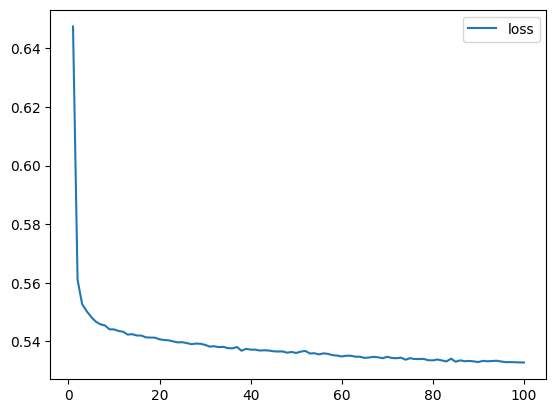

In [133]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(fit_model_A1.history, index=range(1, len(fit_model_A1.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<Axes: >

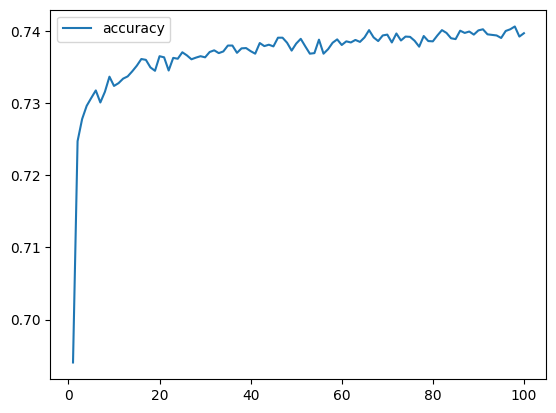

In [134]:
 # Plot the accuracy
df.plot(y="accuracy")

#### Alternative Model 2

In [103]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [104]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [105]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [106]:
from tensorflow import keras
# First hidden layer
nn_A2.add(Dense(units=32, activation='relu', input_dim=number_input_features))
nn_A2.add(keras.layers.Dropout(rate=0.2))
nn_A2.add(Dense(units=16, activation='relu'))
nn_A2.add(Dense(units=8, activation='relu'))
# Output layer
nn_A2.add(Dense(units=number_output_neurons_A2, activation='sigmoid'))

# Check the structure of the model
nn_A2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                3744      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Compile the model
nn_A2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [108]:
# Fit the model
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5988 - accuracy: 0.6997
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5640 - accuracy: 0.7254
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5597 - accuracy: 0.7270
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5558 - accuracy: 0.7291
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5538 - accuracy: 0.7284
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.7306
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5516 - accuracy: 0.7283
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5489 - accuracy: 0.7313
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5493 - accuracy: 0.7306
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accura

<Axes: >

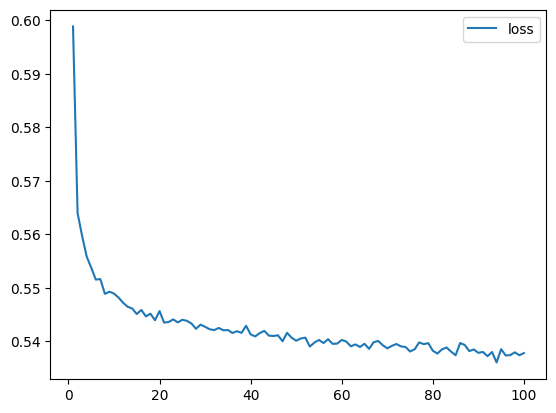

In [110]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(fit_model_A2.history, index=range(1, len(fit_model_A2.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<Axes: >

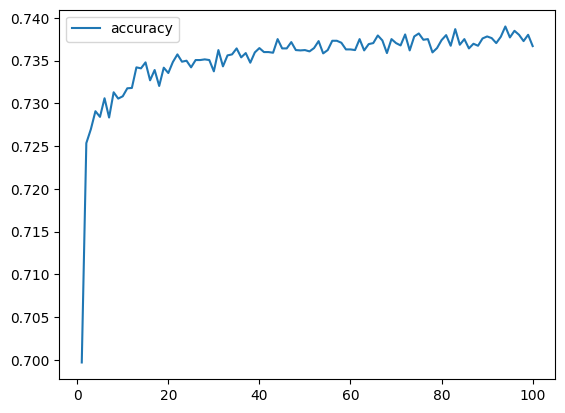

In [111]:
df.plot(y="accuracy")

### Alternative Model 3

In [138]:
X_train_scaled.shape


(25724, 116)

In [137]:
y_train.shape

(25724,)

In [148]:
from sklearn.feature_selection import SelectKBest, f_classif
# Perform feature selection with SelectKBest
k = 22  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [29 44 61 62 63 70 81] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [149]:
selector.get_support(indices=True)

array([  0,   2,   6,  11,  12,  13,  17,  19,  24,  25,  60,  77,  82,
        86,  87,  94,  99, 100, 102, 103, 104, 105])

In [147]:
score_total = pd.DataFrame({"score":list(selector.scores_)}, X_train.columns)
score_total = score_total.sort_values(by=['score'],ascending = False)
bestSelect_scores = score_total.sort_values(by=['score'],ascending = False).iloc[:22,:]
bestSelect_scores

,score
AFFILIATION_CompanySponsored,3977.887013
AFFILIATION_Independent,3966.902385
ORGANIZATION_Association,812.867532
ORGANIZATION_Trust,657.652894
CLASSIFICATION_C2100,566.392760
APPLICATION_TYPE_T19,393.864176
CLASSIFICATION_C7000,333.246150
APPLICATION_TYPE_T4,253.228103
APPLICATION_TYPE_T5,230.872943
APPLICATION_TYPE_T10,209.904112


In [158]:
nn_A3 = Sequential()
from tensorflow import keras
# First hidden layer
nn_A3.add(Dense(units=8, activation='relu', input_dim=22))

nn_A3.add(Dense(units=4, activation='relu'))

# Output layer
nn_A3.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_A3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 8)                 184       
                                                                 
 dense_28 (Dense)            (None, 4)                 36        
                                                                 
 dense_29 (Dense)            (None, 1)                 5         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [159]:
# Compile the model
nn_A3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [164]:
fit_model_A3 = nn_A3.fit(X_train_selected, y_train, epochs=50,batch_size=10)

Epoch 1/50
2573/2573 [==============================] - 5s 2ms/step - loss: 0.5555 - accuracy: 0.7250
Epoch 2/50
2573/2573 [==============================] - 5s 2ms/step - loss: 0.5550 - accuracy: 0.7257
Epoch 3/50
2573/2573 [==============================] - 6s 2ms/step - loss: 0.5549 - accuracy: 0.7252
Epoch 4/50
2573/2573 [==============================] - 5s 2ms/step - loss: 0.5547 - accuracy: 0.7252
Epoch 5/50
2573/2573 [==============================] - 5s 2ms/step - loss: 0.5543 - accuracy: 0.7255
Epoch 6/50
2573/2573 [==============================] - 5s 2ms/step - loss: 0.5542 - accuracy: 0.7251
Epoch 7/50
2573/2573 [==============================] - 5s 2ms/step - loss: 0.5545 - accuracy: 0.7252
Epoch 8/50
2573/2573 [==============================] - 5s 2ms/step - loss: 0.5543 - accuracy: 0.7255
Epoch 9/50
2573/2573 [==============================] - 5s 2ms/step - loss: 0.5542 - accuracy: 0.7255
Epoch 10/50
2573/2573 [==============================] - 5s 2ms/step - loss: 0.554

<Axes: >

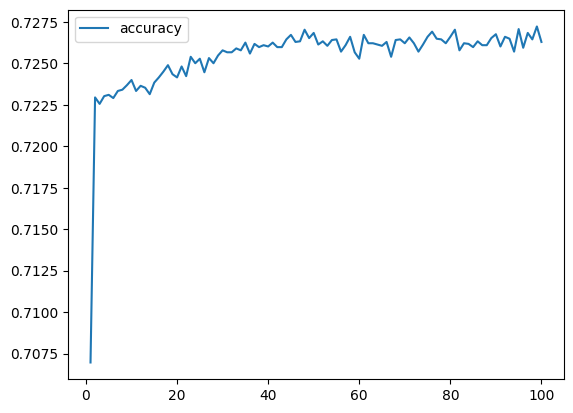

In [162]:
df.plot(y="accuracy")

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [112]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
268/268 - 0s - loss: 0.5538 - accuracy: 0.7318 - 445ms/epoch - 2ms/step
Loss: 0.5537956953048706, Accuracy: 0.7317784428596497


In [113]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
268/268 - 0s - loss: 0.5582 - accuracy: 0.7298 - 475ms/epoch - 2ms/step
Loss: 0.558198094367981, Accuracy: 0.7297959327697754


In [114]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
268/268 - 0s - loss: 0.5505 - accuracy: 0.7320 - 488ms/epoch - 2ms/step
Loss: 0.5505355596542358, Accuracy: 0.7320116758346558


### Step 3: Save each of your alternative models as an HDF5 file.


In [ ]:
# Set the file path for the first alternative model
file_path = "AlphabetSoup_A1.h5"

# Export your model to a HDF5 file
nn_A1.save(file_path)

# Download the model to your computer
files.download(file_path)

In [ ]:
# Set the file path for the second alternative model
file_path = "AlphabetSoup_A2.h5"

# Export your model to a HDF5 file
nn_A2.save(file_path)

# Download the model to your computer
files.download(file_path)